In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import matplotlib.pyplot as plt

# Nhập dữ liệu

In [2]:
train = pd.read_csv(r'D:\Documents\Đồ án tốt nghiệp\Mobile-pricing\Data\train.csv')

In [3]:
train.shape

(2000, 21)

In [4]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


# Preprocessing

## Kiểm tra dữ liệu null

In [6]:
missing_data = train.isnull().sum()
missing_data.loc[missing_data>0]

Series([], dtype: int64)

## Kiểm tra dữ liệu mất cân bằng

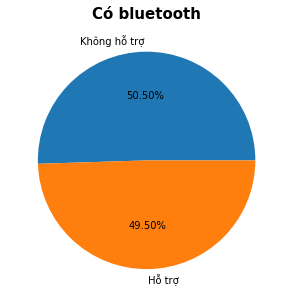

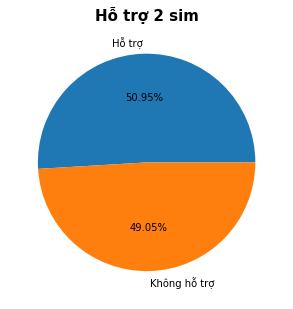

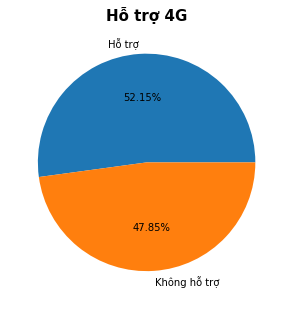

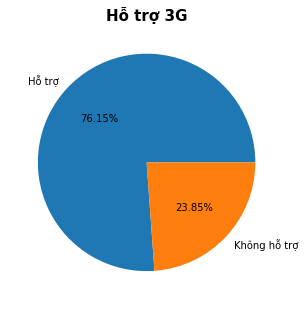

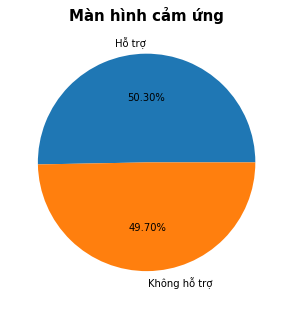

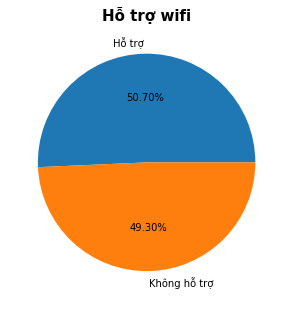

In [7]:
features = {'blue': 'Có bluetooth', 'dual_sim': 'Hỗ trợ 2 sim', 'four_g': 'Hỗ trợ 4G', 'three_g': 'Hỗ trợ 3G', 'touch_screen': 'Màn hình cảm ứng', 'wifi':'Hỗ trợ wifi'}
for feature in features.keys():
    labels = ['Hỗ trợ' if x== 1 else 'Không hỗ trợ' for x in train[feature].value_counts().index.values]
    values = train[feature].value_counts().values
    plt.figure(figsize=(5,5))
    plt.title(features[feature], fontsize=15, fontweight='bold')
    plt.pie(values, labels=labels, autopct='%.2f%%')

## price_range

([<matplotlib.patches.Wedge at 0x243b99a1908>,
 [Text(0.7778174593052024, 0.7778174593052024, 'Giá rất cao'),
  Text(-0.7778174593052023, 0.7778174593052024, 'Giá cao'),
  Text(-0.7778174593052025, -0.7778174593052023, 'Giá trung bình'),
  Text(0.7778174593052022, -0.7778174593052025, 'Giá rẻ')],
 [Text(0.4242640687119285, 0.4242640687119285, '25.00%'),
  Text(-0.42426406871192845, 0.4242640687119285, '25.00%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25.00%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.00%')])

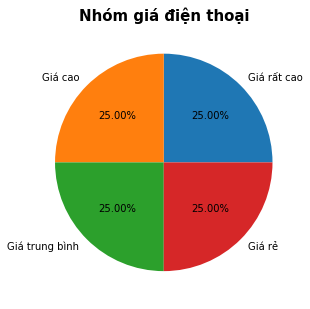

In [8]:
label = []
for val in train['price_range'].value_counts().index:
    if val == 0: 
        label.append('Giá rẻ')
    elif val == 1:
        label.append('Giá trung bình')
    elif val == 2:
        label.append('Giá cao')
    else:
        label.append('Giá rất cao')
value = train['price_range'].value_counts().values
plt.figure(figsize=(15,5))
plt.title('Nhóm giá điện thoại', fontsize=15, fontweight='bold')
plt.pie(value, labels=label, autopct='%.2f%%')

In [9]:
y = train['price_range'].values
x = train.drop(['price_range'], axis=1)

# Normalization

In [10]:
feature_onehot = list(features.keys())
feature_numerical = [feature for feature in x if feature not in feature_onehot]

In [11]:
for feature in feature_numerical:
    mean = x[feature].mean()
    std = x[feature].std()
    x[feature] = x[feature].apply(lambda x: (x-mean)/std)

In [12]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902372,0,0.830572,0,-0.762304,0,-1.380298,0.340654,1.348911,-1.101696,-1.305424,-1.408596,-1.146497,0.391605,-0.784787,0.283032,1.462128,0,0,1
1,-0.495015,1,-1.252751,1,-0.992642,1,1.154735,0.687376,-0.120029,-0.664602,-0.645827,0.585631,1.704039,0.467200,1.113987,-0.635158,-0.734084,1,1,0
2,-1.537302,1,-1.252751,1,-0.531966,1,0.493422,1.380820,0.134210,0.209587,-0.645827,1.392336,1.074699,0.441387,-0.310094,-0.864705,-0.368048,1,1,0
3,-1.418964,1,1.198217,0,-0.992642,0,-1.214970,1.034098,-0.261274,0.646681,-0.151130,1.286428,1.236662,0.594421,0.876640,0.512579,-0.002013,1,0,0
4,1.325574,1,-0.394912,0,2.001753,1,0.658751,0.340654,0.021215,-1.101696,0.673365,1.268401,-0.091429,-0.657502,-1.022134,-0.864705,0.730057,1,1,0


# Xây dựng model phân loại

## Chia tập dữ liệu

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

## SVM Model (Kernel = Linear)

In [15]:
from sklearn.svm import SVC

In [16]:
clf = SVC( kernel='linear')
clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
acc_train = clf.score(x_train, y_train)
print('Train accuracy:',acc_train)
print('Test accuracy:', acc)

Train accuracy: 0.980625
Test accuracy: 0.9525


## SVM Model (Kernel = rbf) 

In [17]:
clf = SVC( kernel='rbf')
clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
acc_train = clf.score(x_train, y_train)
print('Train accuracy:',acc_train)
print('Test accuracy:', acc)

Train accuracy: 0.98
Test accuracy: 0.9175


C:\Users\MANHLK\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Gaussian Naive Bayes Model

In [18]:
 from sklearn.naive_bayes import GaussianNB

In [19]:
clf = GaussianNB()
clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
acc_train = clf.score(x_train, y_train)
print('Train accuracy:',acc_train)
print('Test accuracy:', acc)

Train accuracy: 0.81625
Test accuracy: 0.835


## Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
acc_train = clf.score(x_train, y_train)
print('Train accuracy:',acc_train)
print('Test accuracy:', acc)

Train accuracy: 1.0
Test accuracy: 0.825


## Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
acc = clf.score(x_test, y_test)
acc_train = clf.score(x_train, y_train)
print('Train accuracy:',acc_train)
print('Test accuracy:', acc)

Train accuracy: 0.996875
Test accuracy: 0.7825


C:\Users\MANHLK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
